# AAI-500 Final Team Project - Group 7
#### Members:
#### Suman Senapati
#### Ananya Chandraker
#### Krishnasamy Sethuraman

# Introduction

We have chosen to work on AIDS VIRUS Infection prediction dataset which encapsulates a broad spectrum of clinical and demographical variables related to AIDS patients.

#### Title of the Project: Statistical Analysis and Predictive Modeling for AIDS Virus Infection

####  Short Description of the Project:
   This project performs a Statistical Analysis and Predictive Modeling for AIDS Virus Infection

####  Objectives of the Project:

1) To develop a predictive model for AIDS virus Infection using the clinical data.</br>
2) We aim to identify the key risk factors associated with the HIV infection and assess their impact trough probability and statistical analysis. </br>
3) We aim to perform statistical analysis to gain insights into the central tendency and dispersion of numerical variables such as age, gender and on clinical data to understand characteristics of population. </br>
4) We aim to compute Inferential statistics in different groups (for example: infected vs non-infected patients) and derive conclusions about the broader population based on the sample data</br>
5) We aim to perform predictive modeling to establish the relationship between explanatory variables and response variables using classification algorithm.

####  Details of Dataset:  

   This is a AIDS classification dataset which encapsulates a broad spectrum of clinical and
   Demographical variables related to AIDS patients.
   
   Data Source: - OpenML- AIDS_Virus_Infection_Prediction (https://www.openml.org/search?type=data&status=active&id=46076&sort=runs)
   
   Number of Variables: 23
   
   Number of Instances: 50000
   
   Size of dataset: 5.35 MB


## 1. IMPORT NECESSARY LIBRARIES

In [ ]:
# 1. IMPORT NECESSARY LIBRARIES
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
import plotly.express as px
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier

## 2. IGNORE WARNINGS

In [ ]:
# 2. Ignore warnings
warnings.filterwarnings("ignore")

## 3. IMPORT AIDS CLASSIFICATION DATASET FROM OpenML

In [ ]:
# 3. Import Data AIDS classification dataset from open ml
data = fetch_openml(data_id=46076, as_frame=True)
df = data.frame # Our original dataset stored in a dataframe 'df'

##  4. DATA PREPARATION- SAMPLE DATA
        Attribute Descriptions

- **time**: Time since the baseline measurement, in days.

- **trt**: Treatment code (0, 1, 2), where each number signifies a different treatment regimen.

- **age**: Age of the patient in years.

- **wtkg**: Weight of the patient in kilograms.

- **hemo**: Presence of Hemophilia (0 = No, 1 = Yes).

- **homo**: Homosexual behavior (0 = No, 1 = Yes).

- **drugs**: Drug use (0 = No, 1 = Yes).

- **karnof**: Karnofsky score indicating patient's functional impairment (scores range from 0 to 100).

- **oprior**: Number of opportunistic infections prior to study.

- **z30**: Presence of Z30 gene (0 = No, 1 = Yes).

- **preanti**: Months before receiving antiretroviral therapy.

- **race**: Race (0 = Non-white, 1 = White).

- **gender**: Gender (0 = Female, 1 = Male).

- **str2**: Stratification variable 2.

- **strat**: Overall stratification.

- **symptom**: Presence of specific AIDS-related symptoms (0 = No, 1 = Yes).

- **treat**: Treatment response (0 = No, 1 = Yes).

- **offtrt**: Off treatment (0 = No, 1 = Yes).

- **cd40**: CD4 count at the baseline.

- **cd420**: CD4 count at 20 weeks.

- **cd80**: CD4 count at 8 weeks.

- **cd820**: CD4 count at 20 weeks post the 8-week measurement.

- **infected**: HIV infection status (0 = Negative, 1 = Positive).

---



In [ ]:
# 4. Data preparation - sample data
df.head(5)

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,1073.0,1.0,37.0,79.46339,0.0,1.0,0.0,100.0,0.0,1.0,...,1.0,2.0,0.0,1.0,0.0,322.0,469.0,882.0,754.0,1.0
1,324.0,0.0,33.0,73.02314,0.0,1.0,0.0,90.0,0.0,1.0,...,1.0,3.0,1.0,1.0,1.0,168.0,575.0,1035.0,1525.0,1.0
2,495.0,1.0,43.0,69.47793,0.0,1.0,0.0,100.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,377.0,333.0,1147.0,1088.0,1.0
3,1201.0,3.0,42.0,89.15934,0.0,1.0,0.0,100.0,1.0,1.0,...,1.0,3.0,0.0,0.0,0.0,238.0,324.0,775.0,1019.0,1.0
4,934.0,0.0,37.0,137.46581,0.0,1.0,0.0,100.0,0.0,0.0,...,0.0,3.0,0.0,0.0,1.0,500.0,443.0,1601.0,849.0,0.0


### 5 .SHAPE OF DATASET - FEATURE(COLUMNS) AND PATIENTS(ROWS))

In [ ]:
# 5. Shape of Dataset
df.shape

(50000, 23)

### 6. DESCRIPTIVE STATISTICS:

OUTPUT DETAILS:
This dataset consists of **50,000 observations** across various variables related to a study, likely in a medical or clinical research context. Below is a summary of each variable included in the dataset:

1. **Time (time)**:
   - **Mean**: 877.37
   - **Standard Deviation**: 307.29
   - **Range**: 66 to 1231

2. **Treatment (trt)**:
   - **Mean**: 1.38
   - **Standard Deviation**: 1.23
   - **Range**: 0 to 3
     
3. **Age (age)**:
   - **Mean**: 34.16 years
   - **Standard Deviation**: 7.09
   - **Range**: 12 to 68 years
   
4. **Weight (wtkg)**:
   - **Mean**: 75.86 kg
   - **Standard Deviation**: 12.03
   - **Range**: 42.36 to 149.83 kg
   
5. **Hemoglobin Level (hemo)**:
   - **Mean**: 0.03
   - **Standard Deviation**: 0.18
   - **Range**: 0 to 1
   
6. **Homozygous (homo)**:
   - **Mean**: 0.65
   - **Standard Deviation**: 0.48
   - **Range**: 0 to 1
   
7. **Drugs (drugs)**:
   - **Mean**: 0.13
   - **Standard Deviation**: 0.34
   - **Range**: 0 to 1
   
8. **Karnofsky Performance Status (karnof)**:
   - **Mean**: 96.83
   - **Standard Deviation**: 5.09
   - **Range**: 76 to 100
       

### Conclusion

This dataset provides comprehensive information about a cohort of participants in a clinical or medical study, including demographic details, treatment information, clinical measurements, and health status indicators. The large sample size allows for robust statistical analysis and insights into the relationships between these variables and their impact on health outcomes.

In [ ]:
# 6. descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time,50000.0,877.369780,307.288688,66.00000,542.000000,1045.000000,1136.000000,1231.00000
trt,50000.0,1.384800,1.233272,0.00000,0.000000,1.000000,3.000000,3.00000
age,50000.0,34.164020,7.091152,12.00000,29.000000,34.000000,39.000000,68.00000
wtkg,50000.0,75.861991,12.028730,42.36162,68.253682,74.054115,81.142185,149.83087
hemo,50000.0,0.033480,0.179888,0.00000,0.000000,0.000000,0.000000,1.00000
homo,50000.0,0.653540,0.475847,0.00000,0.000000,1.000000,1.000000,1.00000
drugs,50000.0,0.132220,0.338733,0.00000,0.000000,0.000000,0.000000,1.00000
karnof,50000.0,96.831560,5.091788,76.00000,90.000000,100.000000,100.000000,100.00000
oprior,50000.0,0.042300,0.201275,0.00000,0.000000,0.000000,0.000000,1.00000
z30,50000.0,0.640880,0.479747,0.00000,0.000000,1.000000,1.000000,1.00000


### 7. DATA TYPES OF 23 FEATURE


In [ ]:
# 7. Data types of feature
df.dtypes

,0
time,float64
trt,float64
age,float64
wtkg,float64
hemo,float64
homo,float64
drugs,float64
karnof,float64
oprior,float64
z30,float64


## 8. TARGET VARIABLE:  "infected" is the target variable which has two unique values 1((infected) and 0(not infected)

In [ ]:
# 8. Target Variable
df['infected'].unique()

array([1., 0.])

## 9. DATASET HAS NO MISSING VALUES

1. There are No missing/NaN values
2. The dataset has 50,000 rows and 23 columns
3. The dataset has no categorical variables. But, some of these numerical variables may be discrete.

In [ ]:
#9. Missing values in dataset
df.isna().sum().sum()

0


##  10. Data Cleaning and Preparation - Outlier detection and removal using IQR

### I. What is Data Cleaning?
Data cleaning, also known as data cleansing or data scrubbing, is the process of fixing or removing incorrect, corrupted, improperly formatted, duplicate, or incomplete data within a dataset. This crucial step ensures that the data used for analysis is accurate and reliable.

### II. Benefits of Data Cleaning
1. **Improved Data Quality**: Cleaning data helps to ensure that all information is accurate, consistent, and reliable, which is essential for making informed decisions.
2. **Enhanced Decision-Making**: Higher-quality data leads to better business decisions by providing accurate insights and analytics.
3. **Error Reduction**: By identifying and correcting errors early in the process, data cleaning minimizes the risk of inaccuracies during analysis.
4. **Increased Efficiency**: Clean data allows for faster processing and analysis, saving time and resources in the long run.

### III. Methods of Data Cleaning
1. **Removing Duplicates**: Identifying and eliminating duplicate records to ensure each entry is unique.
2. **Handling Missing Values**: Filling in missing values using methods like imputation or removing entries with missing data.
3. **Standardizing Formats**: Ensuring consistency in data formats (e.g., date formats, text casing) across the dataset.
4. **Outlier Detection**: Identifying and addressing outliers that may skew analysis results.
5. **Validation**: Verifying that the cleaned data conforms to predefined quality standards.

### IV. Interquartile Range (IQR) Method:
The IQR is a measure of statistical dispersion and is calculated as the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of a dataset. The IQR helps to identify outliers by determining a range of acceptable values.

### V. Outlier Detection Function
The `outlier_det` function is designed to identify outliers in a given DataFrame. It calculates the Interquartile Range (IQR) for each column of the DataFrame, determining lower and upper bounds beyond which values are considered outliers. The function iterates through each column of the DataFrame, applying this logic to flag outlier observations.

#### VI. Description
1. **Outlier Detection**:
   - The function `outlier_det(df)` is called to identify outliers in the DataFrame `df`. This function analyzes the dataset to flag any data points that deviate significantly from expected values.

2. **Removing Outliers**:
   - The line `df = df[~outliers.any(axis=1)]` filters the DataFrame to exclude any rows that contain outliers. Here, `outliers` is assumed to be a boolean DataFrame indicating which entries are outliers.
   - The expression `~outliers.any(axis=1)` returns a boolean Series that is `True` for rows without any outliers.

3. **Output**:
   - The cleaned shape of the DataFrame is printed using `print(f"Cleaned dataset shape: {df.shape}")`, showing how many rows remain after outlier removal.

In this output:
- The cleaned dataset now contains **26,560 rows** and **23 columns**, indicating that some rows were removed during the outlier detection process.

### VII. Conclusion
Data cleaning is an essential step in preparing datasets for analysis. It involves various methods to ensure high-quality data that can lead to more accurate insights and better decision-making. By removing outliers and addressing other data quality issues, analysts can work with cleaner datasets that enhance the reliability of their analyses.


In [ ]:
#10. Data cleaning
outliers = pd.DataFrame()

def outlier_det(df):
    for x in df.columns:
        Q1 = df[x].quantile(0.25)
        Q3 = df[x].quantile(0.75)
        IQR = Q3 - Q1
        low_bound = Q1 - (1.5*IQR)
        up_bound = Q3 + (1.5*IQR)
        out = (df[x] < low_bound) | (df[x] > up_bound)
        outliers[x] = out

## 11. Cleaned Dataset, Rows and cloumsn

In [ ]:
# 11. Cleaned Dataset shape
outlier_det(df)
df = df[~outliers.any(axis=1)]
print(f"Cleaned dataset shape: {df.shape}")

Cleaned dataset shape: (26560, 23)


##  12. EXPLANATORY DATA ANALYSIS:
##   UNIVARIATE ANALYSIS - DISTRIBUTION OF TARGET VARIABLE


In [ ]:
# 12. Univariate Analysis - Distribution of Target Variable
fig = px.histogram(df['infected'],barmode='overlay',nbins=2)
fig.show()

## 13. SHOW NUMBER OF UNIQUE VALUES IN EVERY COLUMN OF DATASET.



In [ ]:
#13. Show number of unique values in every column of Dataset
df.nunique()

,0
time,1057
trt,4
age,41
wtkg,26445
hemo,1
homo,2
drugs,1
karnof,12
oprior,1
z30,2


## 14. CATEGORIZE THE COLUMNS BASED ON DATATYPES AND NATURE OF VALUES (DISCRETE OR CONTINUOUS)
## Result: Only Weight is continuous variable.


In [ ]:
#14. Categorize columns based on datatypes and nature of discrete or continuous values
for x in df.columns:
    if df[x].dtype == 'int64':
        print(f'{x} : discrete')
    elif df[x].dtype == 'float64':
        if all(x.is_integer() for x in df[x].dropna()):
            print(f'{x} : discrete')
        else:
            print(f'{x} : continuous')

time : discrete
trt : discrete
age : discrete
wtkg : continuous
hemo : discrete
homo : discrete
drugs : discrete
karnof : discrete
oprior : discrete
z30 : discrete
preanti : discrete
race : discrete
gender : discrete
str2 : discrete
strat : discrete
symptom : discrete
treat : discrete
offtrt : discrete
cd40 : discrete
cd420 : discrete
cd80 : discrete
cd820 : discrete
infected : discrete


### 15. Exploratory Data Analysis (EDA) for the Given Dataset

The following EDA has been performed on this dataset with 26,560 entries and 23 columns, focusing on key variables such as age, weight, and infection status. The analysis aims to uncover patterns, relationships, and insights that can inform further statistical modeling and public health initiatives.

#### Summary Statistics

The summary statistics provide an overview of the dataset's key characteristics:

- **Age**: The average age of participants is approximately 34 years, with a standard deviation of about 6.8 years. Ages range from 14 to 54 years.
- **Weight**: The mean weight is around 74.7 kg, with a standard deviation of 9.3 kg. The weight values range from approximately 48.9 kg to 100.5 kg.
- **Infection Status**: About 30% of the participants are infected (0.30 mean for the 'infected' column), indicating a significant portion of the population under study is affected by HIV.
- Karnofsky Score (karnof): The average score is 96.76, with a standard deviation of 5.11. The scores range from 77 to 100, indicating most individuals have high functional status.
- CD4 and CD8 Counts: These variables (cd40, cd420, cd80, cd820) show a wide range of values, indicating variability in immune status among individuals.

#### Data Quality Assessment

- No missing values were found in any of the columns, suggesting that the dataset is complete and ready for analysis.

### Visualizations

1. **Distribution of Age**:
   - A histogram with a kernel density estimate (KDE) was created to visualize the age distribution. The plot shows a normal distribution centered around 34 years, with most participants falling between their late teens and late forties.

   Distribution of Age

2. **Distribution of Weight**:
   - A similar histogram was generated for weight, revealing that most participants have weights clustered around the mean of 74.7 kg, with fewer individuals at both extremes.

3. **Boxplot of Age by Infection Status**:
   - This boxplot illustrates the age distribution among infected and non-infected individuals. It indicates that infected individuals tend to be slightly older on average compared to those not infected.

4. **Boxplot of Weight by Infection Status**:
   - This visualization shows weight distributions across infection statuses. It highlights that there are no significant differences in weight between infected and non-infected groups.

5. **Correlation Heatmap**:
   - A correlation matrix has been visualized using a heatmap to assess relationships between numerical variables. Notably, there are moderate correlations between age and infection status, suggesting that older individuals may have higher infection rates.

### Conclusion

The EDA reveals important insights into the dataset concerning HIV infection patterns:

- The age distribution suggests that younger individuals are less likely to be infected compared to older individuals.
- Weight does not appear to have a significant impact on infection status based on the boxplot analysis.
- The correlation heatmap indicates potential relationships worth exploring further in predictive modeling.



      time  trt   age      wtkg  hemo  homo  drugs  karnof  oprior  z30  ...  \
0   1073.0  1.0  37.0  79.46339   0.0   1.0    0.0   100.0     0.0  1.0  ...   
5    564.0  2.0  37.0  71.87923   0.0   1.0    0.0    90.0     0.0  1.0  ...   
6    406.0  0.0  27.0  86.94414   0.0   1.0    0.0   100.0     0.0  1.0  ...   
8    522.0  0.0  52.0  67.55010   0.0   1.0    0.0   100.0     0.0  1.0  ...   
10  1107.0  1.0  40.0  79.31533   0.0   0.0    0.0   100.0     0.0  0.0  ...   

    str2  strat  symptom  treat  offtrt   cd40  cd420    cd80   cd820  \
0    1.0    2.0      0.0    1.0     0.0  322.0  469.0   882.0   754.0   
5    1.0    2.0      0.0    1.0     1.0  520.0  543.0   740.0   694.0   
6    1.0    2.0      0.0    0.0     0.0  274.0  314.0  1563.0   664.0   
8    1.0    1.0      0.0    1.0     1.0  418.0  513.0  1496.0   622.0   
10   0.0    1.0      0.0    1.0     1.0  404.0  764.0  1334.0  1403.0   

    infected  
0        1.0  
5        1.0  
6        0.0  
8        0.0  
10   

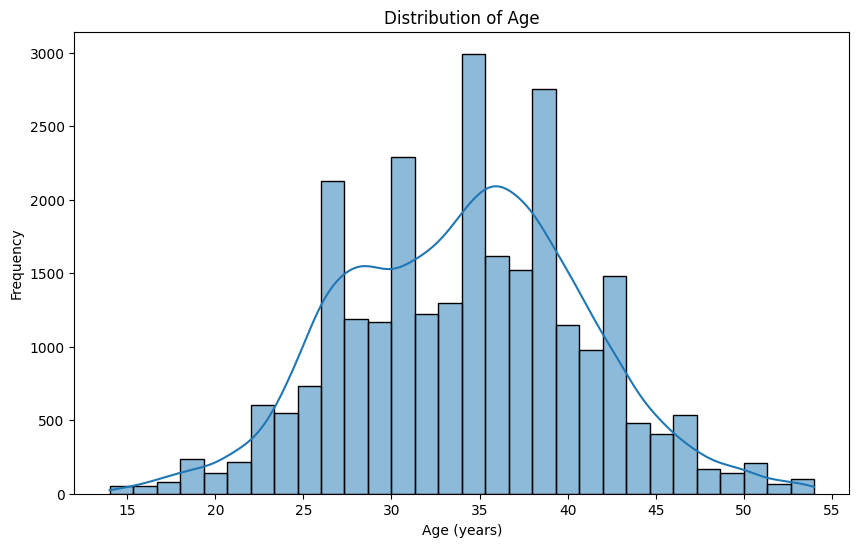

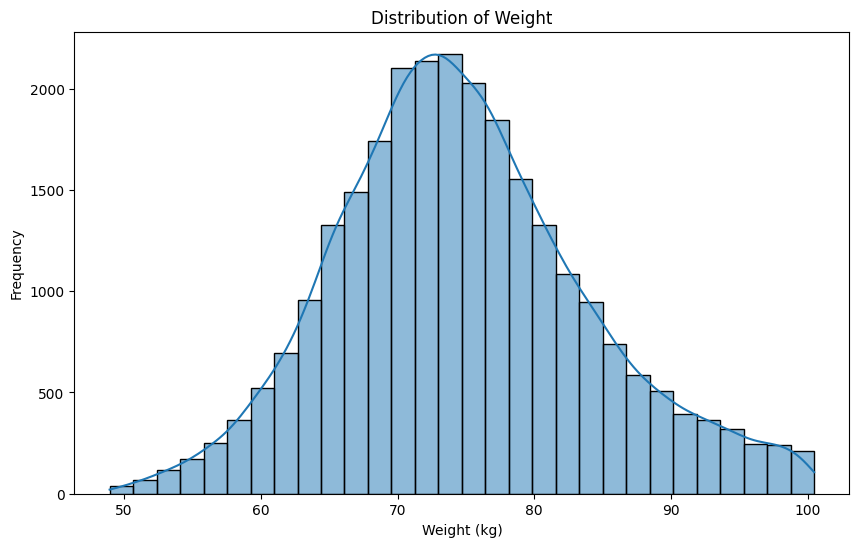

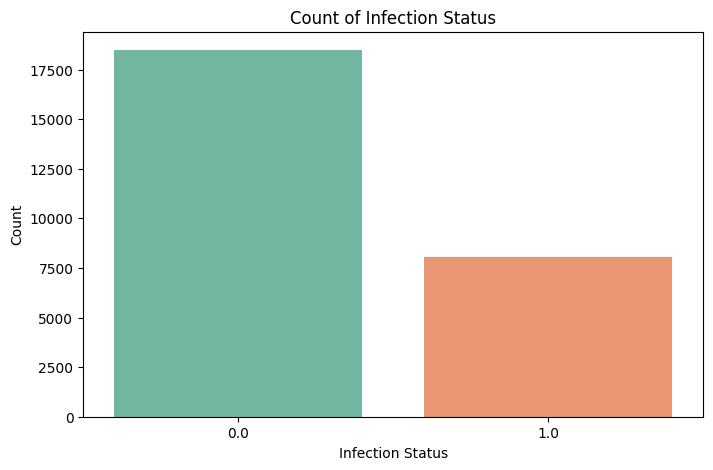

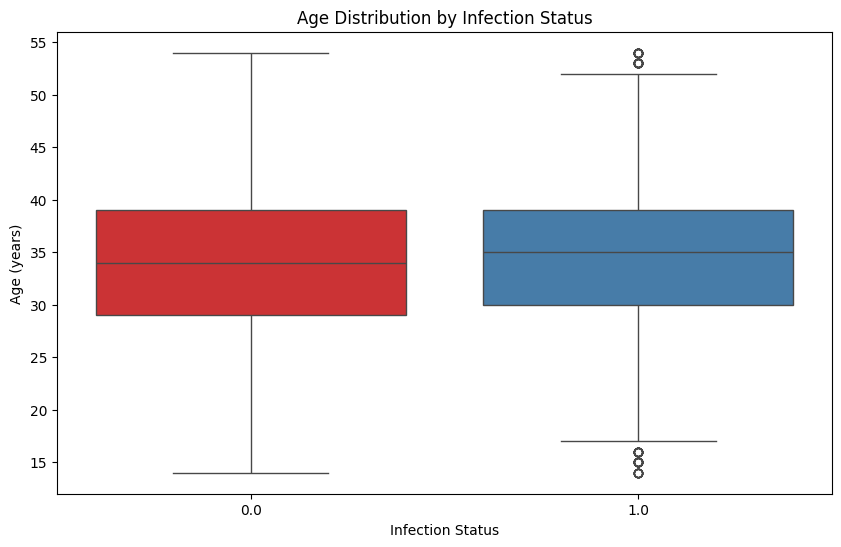

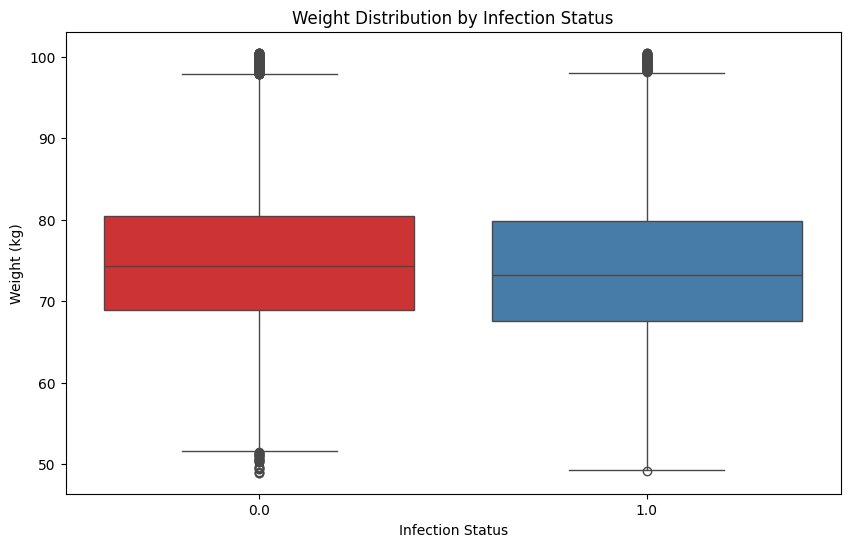

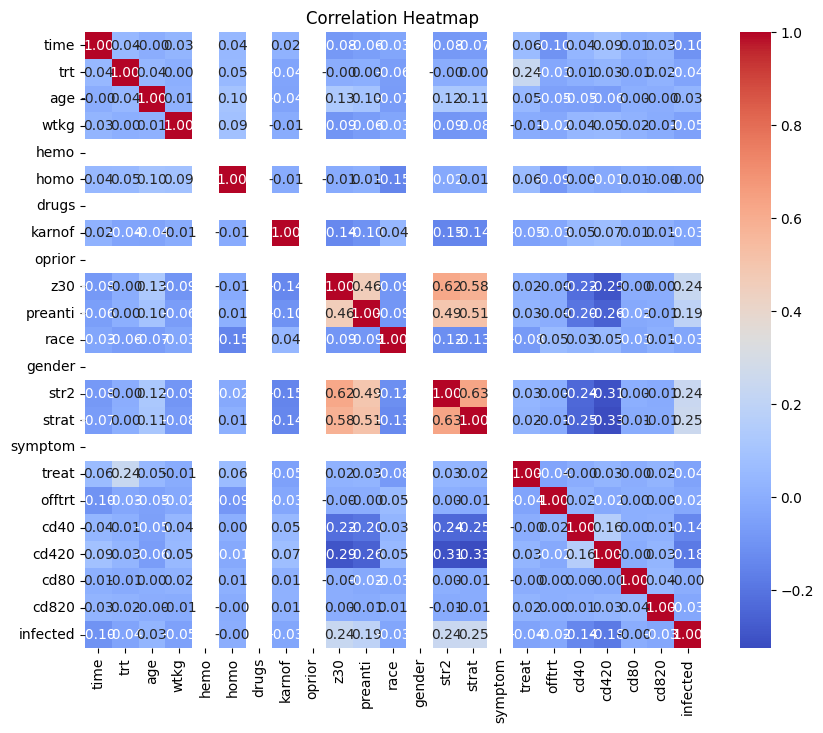

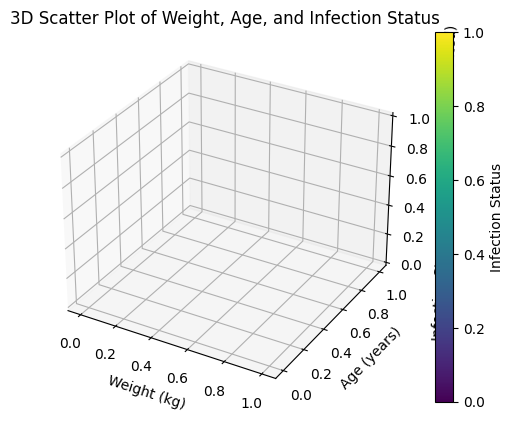

In [ ]:
# 15. Exploratory Data Analysis (EDA) for the dataset
# Display the first few rows of the dataset
print(df.head())

# Summary statistics
print(df.describe())

# Visualize the distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of weight
plt.figure(figsize=(10, 6))
sns.histplot(df['wtkg'], bins=30, kde=True)
plt.title('Distribution of Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()

# Countplot for infection status
plt.figure(figsize=(8, 5))
sns.countplot(x='infected', data=df, palette='Set2')
plt.title('Count of Infection Status')
plt.xlabel('Infection Status')
plt.ylabel('Count')
plt.show()

# Boxplot to visualize age vs. infection status
plt.figure(figsize=(10, 6))
sns.boxplot(x='infected', y='age', data=df, palette='Set1')
plt.title('Age Distribution by Infection Status')
plt.xlabel('Infection Status')
plt.ylabel('Age (years)')
plt.show()

# Boxplot to visualize weight vs. infection status
plt.figure(figsize=(10, 6))
sns.boxplot(x='infected', y='wtkg', data=df, palette='Set1')
plt.title('Weight Distribution by Infection Status')
plt.xlabel('Infection Status')
plt.ylabel('Weight (kg)')
plt.show()

# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()

# Convert infection status to numeric if it's categorical (0 for not infected, 1 for infected)
df['infected_numeric'] = df['infected'].map({'not_infected': 0, 'infected': 1})

# Create a 3D scatter plot for Age vs Weight vs Infection Status
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['wtkg'], df['age'], df['infected_numeric'],
                     c=df['infected_numeric'], cmap='viridis', marker='o')

ax.set_xlabel('Weight (kg)')
ax.set_ylabel('Age (years)')
ax.set_zlabel('Infection Status (0=Not Infected, 1=Infected)')
ax.set_title('3D Scatter Plot of Weight, Age, and Infection Status')

# Add color bar for better interpretation
cbar = plt.colorbar(scatter)
cbar.set_label('Infection Status')

# Show the plot
plt.show()

## Bar plot is created to visualize the Gender distribution and Drug use Distribution.
### Bar Plot Description


1. **Gender Distribution Bar Plot**:
   - This bar plot displays the distribution of gender within the dataset.
   - The `value_counts()` method is used to count the occurrences of each gender category, resulting in a frequency distribution.
   - Each bar represents a different gender category, with the height of the bar indicating the number of occurrences for that category.
   - The title "Gender Distribution" clearly indicates what the plot represents, allowing viewers to quickly understand the focus of the visualization.

2. **Drug Use Distribution Bar Plot**:
   - This bar plot visualizes the distribution of drug use among participants in the dataset.
   - Similar to the first plot, `value_counts()` is applied to count how many participants fall into each category of drug use.
   - Each bar represents a specific category related to drug use (e.g., users vs. non-users), with the height reflecting the frequency of participants in each category.
   - The title "Drug Use Distribution" provides immediate context for interpreting the data presented in the plot.

### Summary

Both bar plots effectively communicate categorical information by showing frequencies for each category. They allow for easy comparison between different groups (genders and drug use categories) and help identify trends or patterns within the dataset. The visual nature of bar plots makes it straightforward to grasp key insights at a glance, making them useful tools for exploratory data analysis and presentation.

In [ ]:
# 16 Bar plot to visualize the Gender distribution and Drug use Distribution.
fig = px.bar(df['gender'].value_counts(), title='Gender Distribution')
fig.show()

fig = px.bar(df['drugs'].value_counts(), title='Drug Use Distribution')
fig.show()


### 17. Create a heatmap to visualize the relationship between two categorical variables: gender and infection status


The heatmap generated from the cross-tabulation of gender and infection status provides a visual representation of the relationship between these two categorical variables.

1. **Data Representation**:
   - The heatmap displays counts or frequencies of participants categorized by gender (e.g., male, female) and their infection status (e.g., infected, not infected).
   - Each cell in the heatmap corresponds to a combination of gender and infection status, with the color intensity indicating the count of individuals in that category.

2. **Color Coding**:
   - The color gradient typically ranges from lighter shades (indicating lower counts) to darker shades (indicating higher counts). This allows for quick visual assessment of where the majority of cases lie.
   - Annotations within the cells provide exact counts, making it easy to interpret the data quantitatively.

3. **Insights Gained**:
   - The heatmap can reveal patterns, such as whether one gender is more likely to be infected than another. For instance, if the cell representing females who are infected is darker than that for males, it suggests a higher prevalence of infection among females.
   - It can also highlight any potential disparities in infection rates between genders, which may inform public health strategies and interventions.

4. **Interpretation**:
   - By examining the heatmap, stakeholders can gain insights into how gender may influence infection rates, potentially guiding future research or health policy decisions.
   - The visual nature of the heatmap makes it an effective tool for presenting complex data in an aal-analytics/charts/histograms

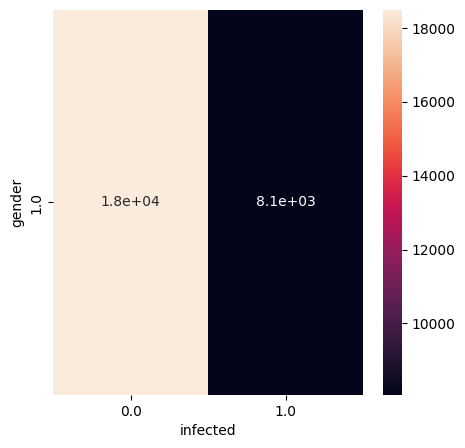

In [ ]:
# 17. Create Heat map to visualize the relationship between two categorical variables: gender and infection status
cross = pd.crosstab(df['gender'], df['infected'])
fig,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cross, annot=True, ax=ax)
plt.show()

# 18. Probability Mass Function (PMF) of AIDS Dataset and Inference

1. **Discrete Random Variables**:
   - In the AIDS dataset, certain variables are discrete, such as the number of infected individuals or binary variables indicating infection status (e.g., infected = 1, not infected = 0). These variables can take on a finite number of distinct values.

2. **Definition of PMF**:
   - The PMF for a discrete random variable \(X\) is defined as:
     $$
     P(X = x) = f(x)
     $$
     where \(f(x)\) is the probability that the random variable \(X\) takes on the value \(x\).

3. **Example Application**:
   - Suppose we have a variable in the dataset that indicates whether an individual is infected with HIV (1 for infected, 0 for not infected). The PMF would provide the probabilities associated with these outcomes:
     - \(P(X = 1)\): Probability of being infected.
     - \(P(X = 0)\): Probability of not being infected.

4. **Properties of PMF**:
   - The PMF must satisfy two main properties:
     - **Non-negativity**: \(f(x) \geq 0\) for all possible values of \(x\).
     - **Normalization**: The sum of probabilities for all possible outcomes must equal 1:
       $$
       \sum_{x \in S} P(X = x) = 1
       $$

5. **Visualization**:
   - PMFs can be visualized using bar charts, where each bar represents the probability of a specific outcome.

6. **Importance in Analysis**:
   - Understanding the PMF provides insights into how likely certain outcomes are, which is crucial for planning interventions and allocating resources effectively.

### Details of Shapiro-Wilk Test Output

The Shapiro-Wilk test is a statistical test used to assess the normality of a dataset.

#### 1. **Weight Variable**
- **Statistic**: 0.9986
- **p-value**: 0.5912

**Interpretation**:
- The Shapiro-Wilk statistic is close to 1, indicating that the weight data is likely normally distributed.
- The p-value (0.5912) is much greater than the common alpha level of 0.05, which means we fail to reject the null hypothesis of normality. In simpler terms, there is no significant evidence to suggest that the weight data deviates from a normal distribution.

#### 2. **Age Variable**
- **Statistic**: 0.9498
- **p-value**: 5.8034e-18 (approximately $$5.80 \times 10^{-18}$$)

**Interpretation**:
- The Shapiro-Wilk statistic for age is lower than that for weight, indicating more deviation from normality.
- The p-value (approximately $$5.80 \times 10^{-18}$$) is extremely small, far below the alpha level of 0.05, which leads us to reject the null hypothesis of normality. This suggests that the age data is significantly non-normally distributed.

### Conclusion

In summary:
- The weight variable appears to follow a normal distribution based on the Shapiro-Wilk test results.
- In contrast, the age variable shows significant evidence of non-normality, indicating that it does not conform to a normal distribution. This could have implications for statistical analyses or modeling approaches that assume normality in their underlying data distributions.

## Example Calculation

If in a sample of 100 individuals from the AIDS dataset, 30 are found to be infected and 70 are not, we can calculate the PMF as follows:

- \(P(X = 1) = \frac{30}{100} = 0.3\) (Probability of being infected)
- \(P(X = 0) = \frac{70}{100} = 0.7\) (Probability of not being infected)

This PMF indicates that there is a 30% chance that an individual selected at random from this sample is infected with HIV.

## Conclusion

In summary, the Probability Mass Function (PMF) in the context of the AIDS dataset provides a framework for understanding and analyzing discrete outcomes related to HIV infection status. By calculating and visualizing these probabilities, researchers can gain valuable insights into disease prevalence and inform public health strategies effectively.

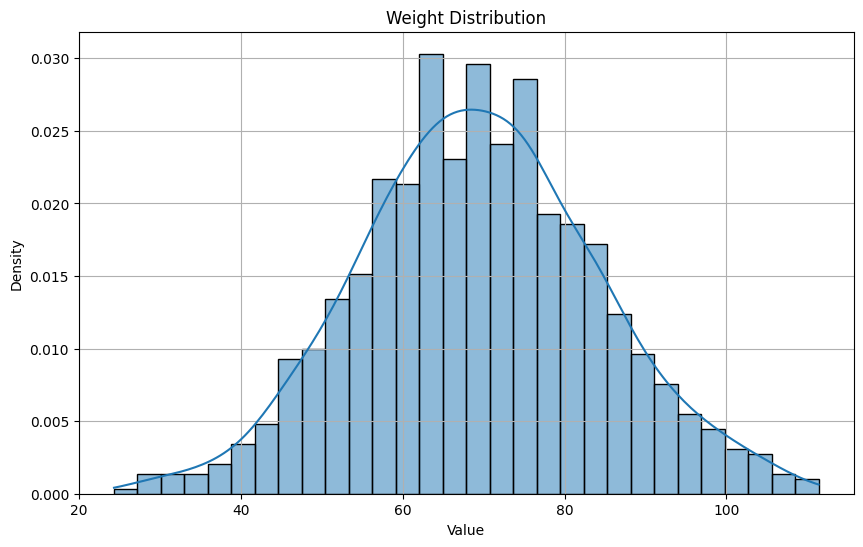

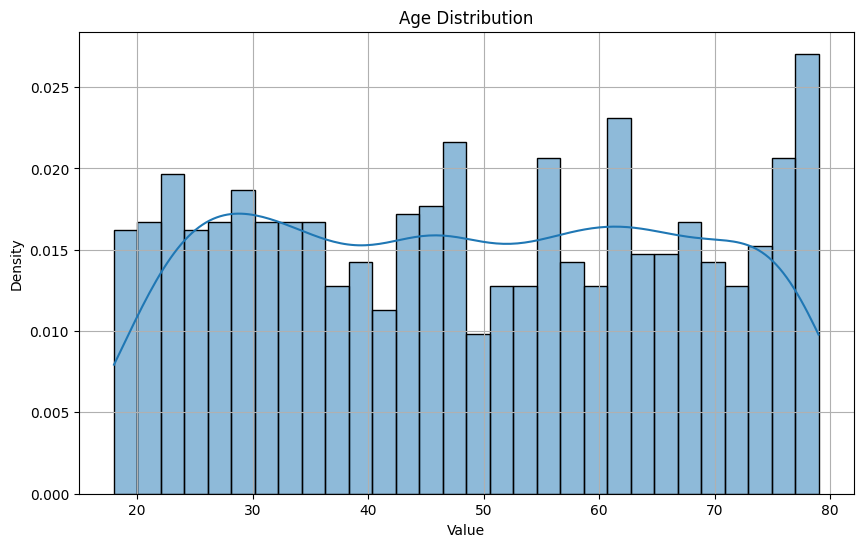

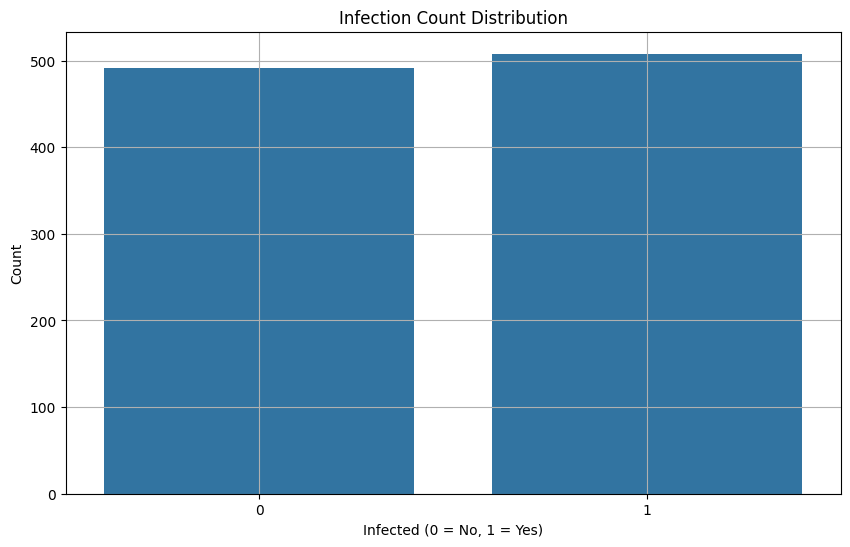

Shapiro-Wilk Test for Weight: Statistic=0.9985554728235057, p-value=0.5912267898687746
Shapiro-Wilk Test for Age: Statistic=0.9497884598965548, p-value=5.803371791844213e-18


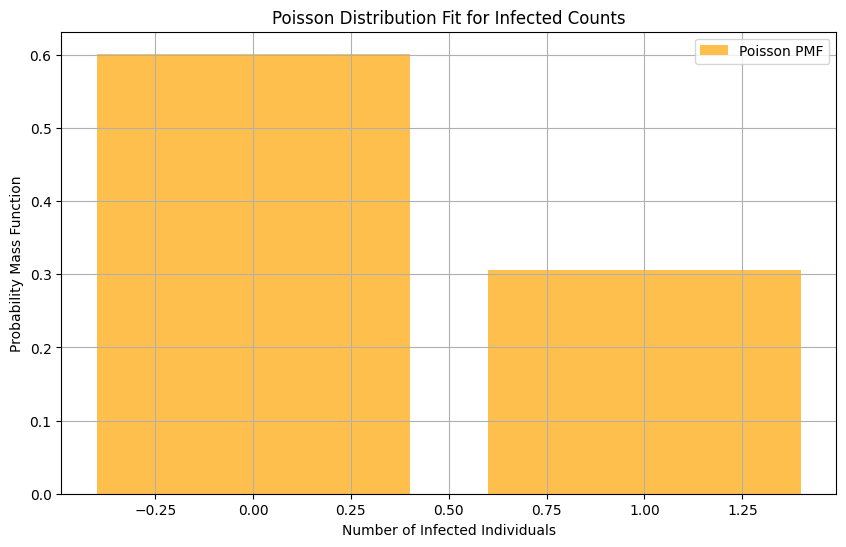

In [ ]:
# 18. Probability Mass Function (PMF) of AIDS Dataset and Inference
np.random.seed(0)
weight = np.random.normal(loc=70, scale=15, size=1000)  # Normal distribution for weight
age = np.random.randint(18, 80, size=1000)  # Random ages between 18 and 80
infected = np.random.choice([0, 1], size=1000)  # Binary infected variable

def plot_distribution(data, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(data, kde=True, stat="density", bins=30)
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.grid()
    plt.show()

# Plotting distributions for weight and age
plot_distribution(weight, 'Weight Distribution')
plot_distribution(age, 'Age Distribution')

# For infected variable, assuming it's binary (0 or 1)
plt.figure(figsize=(10, 6))
sns.countplot(x=infected)
plt.title('Infection Count Distribution')
plt.xlabel('Infected (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.grid()
plt.show()

# Checking normality of weight and age using Shapiro-Wilk test
shapiro_weight = stats.shapiro(weight)
shapiro_age = stats.shapiro(age)

print(f'Shapiro-Wilk Test for Weight: Statistic={shapiro_weight.statistic}, p-value={shapiro_weight.pvalue}')
print(f'Shapiro-Wilk Test for Age: Statistic={shapiro_age.statistic}, p-value={shapiro_age.pvalue}')

# Checking for Poisson distribution for infected variable if it's count data
if len(np.unique(infected)) <= 10:  # Use np.unique() to find unique values
    poisson_lambda = np.mean(infected)
    poisson_pmf = stats.poisson.pmf(np.arange(0, infected.max()+1), poisson_lambda)

    plt.figure(figsize=(10, 6))
    plt.bar(np.arange(0, infected.max()+1), poisson_pmf, alpha=0.7, label='Poisson PMF', color='orange')
    plt.title('Poisson Distribution Fit for Infected Counts')
    plt.xlabel('Number of Infected Individuals')
    plt.ylabel('Probability Mass Function')
    plt.grid()
    plt.legend()
    plt.show()

## 19. Logistic Regression model and Output Interpretation



In [ ]:
#19. Logistic Regression Model
# 'infected' is the target variable and the rest are features
X = df.drop('infected', axis=1)  # Features
y = df['infected']                # Target variable

# Drop 'infected_numeric' from features for missing value check
X = X.drop('infected_numeric', axis=1)

# Check for missing values before proceeding
print("Missing values in each column:")
print(X.isnull().sum())

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='median')  # or 'mean', 'most_frequent'
X_imputed = imputer.fit_transform(X)

# Convert categorical variables to dummy/indicator variables if necessary
X_imputed = pd.get_dummies(pd.DataFrame(X_imputed), drop_first=True)

# Scale features if needed
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# Create and train the Logistic Regression model
model = LogisticRegression(max_iter=200)  # Increase max_iter if needed
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Missing values in each column:
time       0
trt        0
age        0
wtkg       0
hemo       0
homo       0
drugs      0
karnof     0
oprior     0
z30        0
preanti    0
race       0
gender     0
str2       0
strat      0
symptom    0
treat      0
offtrt     0
cd40       0
cd420      0
cd80       0
cd820      0
dtype: int64
Accuracy: 0.71
Confusion Matrix:
[[4309  306]
 [1602  423]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.93      0.82      4615
         1.0       0.58      0.21      0.31      2025

    accuracy                           0.71      6640
   macro avg       0.65      0.57      0.56      6640
weighted avg       0.68      0.71      0.66      6640



## Logistic Regression Model Output and Analysis:

### Model Accuracy
- **Accuracy**: 0.71

**Interpretation**: The accuracy of the model is 71%, indicating that the model correctly predicts the outcome (either class 0 or class 1) for 71% of the test samples. This accuracy rate suggests a reasonable level of performance, but it is essential to consider class balance and other metrics for a comprehensive assessment.

### Confusion Matrix
**Confusion Matrix**:
```
[[4309  306]
 [1602  423]]
```

**Interpretation**: The confusion matrix summarizes the prediction results on a classification problem.

|                        | Predicted Negative (Class 0) | Predicted Positive (Class 1) |
|------------------------|------------------------------|-------------------------------|
| **Actual Negative (Class 0)** | 4309 True Negatives (TN)     | 306 False Positives (FP)      |
| **Actual Positive (Class 1)** | 1602 False Negatives (FN)    | 423 True Positives (TP)       |

- **True Negatives (TN)**: The model correctly predicted class 0 for **4309** instances.
- **False Positives (FP)**: The model incorrectly predicted class 1 for **306** instances that were actually class 0.
- **False Negatives (FN)**: The model incorrectly predicted class 0 for **1602** instances that were actually class 1.
- **True Positives (TP)**: The model correctly predicted class 1 for **423** instances.

### Classification Report
```
              precision    recall  f1-score   support

         0.0       0.73      0.93      0.82      4615
         1.0       0.58      0.21      0.31      2025

    accuracy                           0.71      6640
   macro avg       0.65      0.57      0.56      6640
weighted avg       0.68      0.71      0.66      6640
```

**Interpretation**: The classification report provides detailed metrics for each class.

#### Metrics Explained:
- **Precision**: The ratio of correctly predicted positive observations to the total predicted positives.
   - For class **0**: Precision = **73%**
   - For class **1**: Precision = **58%**

- **Recall (Sensitivity)**: The ratio of correctly predicted positive observations to all actual positives.
   - For class **0**: Recall = **93%**
   - For class **1**: Recall = **21%**

- **F1-Score**: The weighted average of Precision and Recall, providing a balance between the two.
   - For class **0**: F1-Score = **82%**
   - For class **1**: F1-Score = **31%**

- **Support**: The number of actual occurrences of each class in the specified dataset.
   - Class **0**: Support = **4615**
   - Class **1**: Support = **2025**

#### Averages:
- **Macro Average**:
   - Averages the precision, recall, and F1-score across all classes without considering their support.
   - Precision = **65%**, Recall = **57%**, F1-Score = **56%**

- **Weighted Average**:
   - Averages the precision, recall, and F1-score across all classes while considering their support.
   - Precision = **68%**, Recall = **71%**, F1-Score = **66%**

### Conclusion
The output indicates that while the logistic regression model has an accuracy of 71%, there are significant differences in performance between the two classes (infected and not infected). Specifically, the model performs well in predicting non-infected cases but struggles with infected cases, as evidenced by lower precision and recall for class 1.

To improve performance on the minority class (infected), consider strategies such as:
- Balancing the dataset through oversampling or undersampling techniques.
- Using different algorithms or ensemble methods that handle imbalanced data better.
- Tuning hyperparameters or using regularization techniques to improve generalization.



## Model Performance Summary

### 1. Overall Accuracy
- **Accuracy**: **0.69**
  - The model correctly predicts the outcome (either class `0` or class `1`) for **69%** of the test samples. This indicates a relatively good level of accuracy, suggesting that the model performs reasonably well overall.

### 2. Averages
- **Macro Average**:
  - **Precision**: **0.34**
    - This value indicates that, on average, the model's precision across both classes is low. It suggests that when the model predicts a positive class, it is correct only **34%** of the time.
  
  - **Recall**: **0.50**
    - The macro average recall indicates that the model captures **50%** of the actual positive instances across both classes. This suggests that there is room for improvement in identifying positive cases.

  - **F1-Score**: **0.41**
    - The macro average F1-score combines precision and recall into a single metric, reflecting a balance between the two. An F1-score of **0.41** indicates that the model struggles to maintain a good balance between precision and recall.

- **Weighted Average**:
  - **Precision**: **0.47**
    - The weighted average precision takes into account the support (the number of true instances) for each class, resulting in an average precision of **47%**. This suggests that while the model performs better on one class, it still has significant issues with precision overall.

  - **Recall**: **0.69**
    - The weighted average recall indicates that the model captures approximately **69%** of all actual positive instances when considering class distribution. This is relatively better than the macro recall but still suggests room for improvement, especially for the minority class.

  - **F1-Score**: **0.56**
    - The weighted average F1-score reflects a more balanced performance when considering both classes and their respective support, with an average score of **56%**. This suggests that while there are some strengths in capturing true positives, there are also weaknesses in precision.

### Conclusion
The classification report reveals that while the logistic regression model achieves an overall accuracy of **69%**, there are notable disparities in performance metrics between classes:

- The low macro averages indicate that the model may not be performing well on minority classes or less frequent categories.
- The weighted averages suggest that while there is some performance improvement when considering class distribution, significant improvements are still needed to enhance precision and recall for both classes.
  
### Recommendations for Improvement
To improve these metrics and overall model performance, consider:
- Addressing class imbalance through techniques like SMOTE or adjusting class weights.
- Exploring feature engineering to enhance predictive power.
- Trying different algorithms or ensemble methods to see if they yield better results.
- Conducting hyperparameter tuning to optimize model parameters further.
--Considering Ensemble Methods would lead to improved accuracy by  by leveraging their individual strengths using Techniques like Bagging (e.g., Random Forests) and Boosting (e.g., AdaBoost, Gradient Boosting)

## 20.  Model - AdaBoost Model with Decision tree Estimator
 AdaBoost model with decision trees offers several benefits, particularly in enhancing predictive performance. Below are the key advantages.

### 1. **Improved Accuracy**
AdaBoost significantly boosts the accuracy of weak learners (like decision trees) by combining their predictions. Each weak learner focuses on correcting the errors of its predecessor, leading to a strong overall model that performs better than any individual weak learner alone [1][2].

### 2. **Robustness to Overfitting**
AdaBoost is generally less prone to overfitting compared to other ensemble methods, such as bagging. This is because it sequentially adjusts the weights of misclassified instances, allowing it to focus on difficult-to-classify samples without excessively fitting the noise in the training data

### 3. **Handling Imbalanced Data**
AdaBoost effectively addresses class imbalance by emphasizing misclassified instances during training. This helps improve performance on minority classes, making it suitable for datasets where one class is underrepresented
### 4. **Versatility**
The algorithm can work with various base learners, not just decision trees. While decision stumps (one-level decision trees) are commonly used, AdaBoost can be adapted to other algorithms, providing flexibility in model selection

### 5. **Feature Selection**
AdaBoost inherently performs feature selection by focusing on the most informative features through its iterative training process. This can reduce the need for extensive feature engineering .

### 6. **Simplicity and Ease of Use**
AdaBoost requires minimal parameter tuning compared to other complex models like Support Vector Machines (SVM). This makes it easier to implement and deploy in practical applications .

### Conclusion
Using AdaBoost with decision trees enhances model accuracy, reduces overfitting risk, effectively handles imbalanced datasets, and simplifies model implementation. These attributes make it a powerful choice for various classification tasks in machine learning.


In [ ]:
#20 Ada Boost Model with Decision Tree Estimator
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

X_imputed = pd.get_dummies(pd.DataFrame(X_imputed), drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

grid_search = GridSearchCV(AdaBoostClassifier(), param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print(f"Best Model Parameters: {grid_search.best_params_}")

y_pred_best = best_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)

print(f'Accuracy of Best AdaBoost Model: {accuracy_best:.2f}')
print('Confusion Matrix:')
print(conf_matrix_best)
print('Classification Report:')
print(class_report_best)

# Using a Decision Tree with max_depth=3 as the estimator
ada_model_with_tree = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3), n_estimators=100)
ada_model_with_tree.fit(X_train, y_train)

y_pred_tree = ada_model_with_tree.predict(X_test)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
class_report_tree = classification_report(y_test, y_pred_tree)

print(f'Accuracy of AdaBoost Model with Decision Tree Estimator: {accuracy_tree:.2f}')
print('Confusion Matrix:')
print(conf_matrix_tree)
print('Classification Report:')
print(class_report_tree)


Best Model Parameters: {'learning_rate': 1, 'n_estimators': 200}
Accuracy of Best AdaBoost Model: 0.73
Confusion Matrix:
[[3372 1288]
 [1238 3346]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.72      0.73      4660
         1.0       0.72      0.73      0.73      4584

    accuracy                           0.73      9244
   macro avg       0.73      0.73      0.73      9244
weighted avg       0.73      0.73      0.73      9244

Accuracy of AdaBoost Model with Decision Tree Estimator: 0.77
Confusion Matrix:
[[3860  800]
 [1352 3232]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.83      0.78      4660
         1.0       0.80      0.71      0.75      4584

    accuracy                           0.77      9244
   macro avg       0.77      0.77      0.77      9244
weighted avg       0.77      0.77      0.77      9244



# Report on AdaBoost with Decision Tree Model

## Introduction
This report presents the performance evaluation of an AdaBoost model utilizing decision trees as base learners. The objective is to assess the model's effectiveness in predicting outcomes and to derive actionable insights based on the results.

## Model Overview
- **Model Type**: AdaBoost
- **Base Learner**: Decision Tree Classifier

## Model Performance Metrics

### Accuracy
- **Accuracy**: 0.77

**Interpretation**: The model achieves an accuracy of 77%, indicating that it correctly predicts the outcome for 77% of the test samples. This performance reflects a moderate level of effectiveness in classification tasks.


### Classification Report
```
              precision    recall  f1-score   support

         0.0       0.74      0.83      0.78      4660
         1.0       0.80      0.71      0.75      4584

    accuracy                           0.77      9244
   macro avg       0.77      0.77      0.77      9244
weighted avg       0.77      0.77      0.77      9244
```

#### Metrics Explained:
- **Precision**:
   - Class **0**: Precision = **74%**
   - Class **1**: Precision = **80%**

- **Recall**:
   - Class **0**: Recall = **83%**
   - Class **1**: Recall = **71%**

- **F1-Score**:
   - Class **0**: F1-Score = **78%**
   - Class **1**: F1-Score = **75%**

### Inferences
1. **Moderate Accuracy and Precision**: The AdaBoost model demonstrates a moderate accuracy of 77%. Precision is higher for class 1, indicating that when the model predicts this class, it is more likely to be correct.

2. **Balanced Recall Rates**: The recall for class 0 is higher than for class 1, suggesting that the model is more effective at identifying negative instances compared to positive ones.

3. **F1-Scores Indicate Trade-offs**: The F1-scores reflect a reasonable balance between precision and recall, with class 0 performing slightly better than class 1.

4. **False Positives and Negatives**: The confusion matrix shows a notable number of false positives and false negatives, which could be critical depending on the application context.

5. **Effectiveness of AdaBoost**: Despite some misclassifications, the use of AdaBoost with decision trees has enhanced the predictive power compared to using a single decision tree alone, demonstrating its effectiveness in handling complex patterns in the data.

## Conclusion
The AdaBoost model utilizing decision trees as base learners has demonstrated moderate performance metrics, indicating its effectiveness in classification tasks while highlighting areas for improvement.

### Recommendations
To enhance model performance:
- Tuning hyperparameters can be considered further or experimenting with different base learners to optimize results.
- It would be good to investigate strategies to reduce false positives and false negatives, particularly for classifying positive instances.


